# 梯度下降法

最小二乘法的解需要$X^{T}X$可逆，要是不可逆，或者存在问题，此时可以用梯度下降法。

梯度下降法步骤如下：
* 1.初始化参数 $W$、$t=0$
* 2.步数$t \leftarrow t+1$
* 3.计算预测值$\hat{y} = X * W$
* 4.计算梯度/变化量 $\Delta W = (\Delta W_1,\cdots,\Delta W_n), \Delta W_j = \alpha * \sum ((y- \hat{y})*x_j)$ 
* 5.调整参数 $W \leftarrow W+\Delta W$

梯度下降法需要先做数据的标准化处理，否则权重会非常大，学习过程会出问题。

# 数据预处理

In [15]:
import numpy as np 
import pandas as pd

In [4]:
data = pd.read_csv('/data/boston_housing.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


# 数据标准化处理

In [39]:
class StandardScaler:
    """把数据标准化处理成正态分布 """
    def fit(self, X):
        X = np.asarray(X)
        self.std_ = np.std(X, axis = 0) #对每个特征列都标准化处理
        self.mean_ = np.mean(X, axis = 0)
        
    def transform(self, X):
        return (X - self.mean_) / self.std_
    
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

# 梯度下降法

In [36]:
class LinearRegression:
    
    def __init__(self, alpha, times):
        self.alpha = alpha
        self.times = times
        
    def fit(self, X, y):
        X = np.asarray(X)
        y = np.asarray(y)
        
        self.w_ = np.zeros(1+X.shape[1]) # 多一个值作为截距
        self.loss_ = []        
        for x in range(self.times):
            y_hat = np.dot(X, self.w_[1:]) + self.w_[0] # 注意这里不能用乘号，用dot
            error = y - y_hat
            self.loss_.append(np.sum(error**2) / 2)
            self.w_[0] += self.alpha * np.sum(error)
            self.w_[1:] += self.alpha * np.dot(X.T, error) 
            #这里要把X转置，是需要求每一列与error相乘，转置后方便使用矩阵乘法            
         
    def predict(self, X):
        X = np.asarray(X)
        result =np.dot(X, self.w_[1:]) + self.w_[0]
        return result

In [67]:
lr = LinearRegression(alpha = 0.0005, times = 20)
t = data.sample(len(data),random_state = 0)
train_X = t.iloc[:400, :-1]
train_y = t.iloc[:400, -1]
test_X = t.iloc[400:, :-1]
test_y = t.iloc[400:, -1]

In [68]:
# 避免特征中数量级的不同从而在梯度下降学习过程中带来影响，对数据进行标准化处理
s = StandardScaler()
train_X= s.fit_transform(train_X)
test_X = s.transform(test_X)

s2 = StandardScaler()
train_y= s2.fit_transform(train_y)
test_y= s2.transform(test_y)

test_y.head()

279    1.414514
227    1.022976
148   -0.520801
143   -0.766911
334   -0.196384
Name: medv, dtype: float64

In [69]:
lr.fit(train_X, train_y)
result = lr.predict(test_X)
display(np.mean((result-test_y)**2))

0.20335314617192102

In [72]:
display(lr.w_, lr.loss_) 
#注意，当选择alpha=0.001的时候，误差会越来越大，说明学习的步长太大
#只有当loss越来越小的时候才是正确的

array([ 1.68809411e-16, -7.82096101e-02,  3.27417218e-02, -4.18423834e-02,
        7.23915815e-02, -1.22422484e-01,  3.18709730e-01, -9.44094559e-03,
       -2.09320117e-01,  1.04023908e-01, -5.20477318e-02, -1.82216410e-01,
        9.76133507e-02, -3.94395606e-01])

[200.0,
 107.18106695239439,
 88.90466866295792,
 79.78035025519529,
 74.3187880885867,
 70.90417512718281,
 68.69155318506807,
 67.20013197881177,
 66.15079837015878,
 65.37902020765745,
 64.78625525603303,
 64.31246996531247,
 63.920412106879105,
 63.586500210988966,
 63.295479267264845,
 63.03724485771134,
 62.80493063951664,
 62.59374088047521,
 62.40022787877571,
 62.22183840063286]

# 可视化

In [73]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = 'SimHei'
mpl.rcParams['axes.unicode_minus'] = False
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

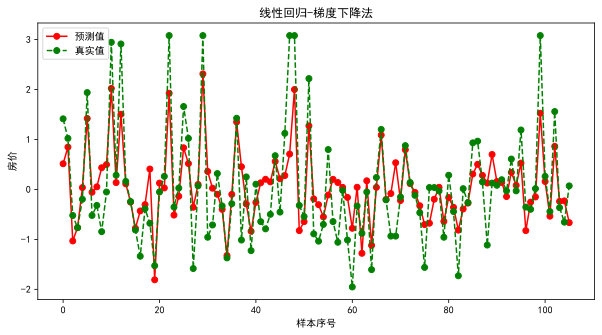

In [87]:
plt.figure(figsize = (10,5))
plt.plot(result, 'ro-', label = '预测值')
plt.plot(test_y.values, 'go--', label = '真实值')
plt.title('线性回归-梯度下降法')
plt.xlabel('样本序号')
plt.ylabel('房价')
plt.legend()
plt.show()

Text(0.5, 1.0, '学习次数-误差(学习率=0.0005)')

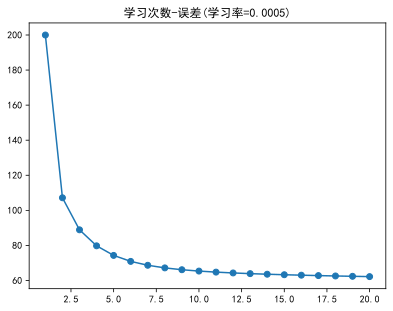

In [80]:
plt.plot(range(1, lr.times+1), lr.loss_, 'o-')
plt.title('学习次数-误差(学习率=0.0005)')

# 当然，也可以拿一列特征出来做线性回归

In [84]:
lr_1 = LinearRegression(alpha = 0.0005, times = 50)
t1 = data.sample(len(data), random_state = 0)
train_X_1 = t1.iloc[:400, 5:6] 
#实际上想取第5列，但是只写[:400,5]会导致取出来的是一个series，这样写可以取出一个矩阵
train_y_1 = t1.iloc[:400, -1]
test_X_1 = t1.iloc[400:, 5:6]
test_y_1 = t1.iloc[400:, -1]

s3 = StandardScaler()
train_X_1 = s3.fit_transform(train_X_1) 
test_X_1 = s3.transform(test_X_1) 
s4 = StandardScaler()
train_y_1 = s4.fit_transform(train_y_1) 
test_y_1 = s4.transform(test_y_1) 

lr_1.fit(train_X_1, train_y_1)
result = lr_1.predict(test_X_1)
display(np.mean((result-test_y_1)**2))

0.4607175893716215

array([-2.77333712e-16,  6.54984608e-01])

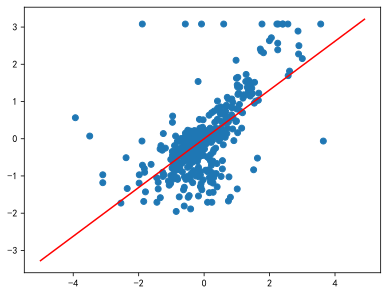

In [86]:
plt.scatter(train_X_1['rm'], train_y_1)
display(lr_1.w_)

x = np.arange(-5,5,0.1)
y = lr_1.w_[0] + lr_1.w_[1]*x
plt.plot(x,y, 'r')